In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm as cm
import numpy as np
%matplotlib inline

In [2]:
train=pd.read_csv('../input/train.csv')
train.describe()

,row_id,x,y,accuracy,time,place_id
count,2.911802e+07,2.911802e+07,2.911802e+07,2.911802e+07,2.911802e+07,2.911802e+07
mean,1.455901e+07,4.999770e+00,5.001814e+00,8.284912e+01,4.170104e+05,5.493787e+09
std,8.405649e+06,2.857601e+00,2.887505e+00,1.147518e+02,2.311761e+05,2.611088e+09
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000016e+09
25%,7.279505e+06,2.534700e+00,2.496700e+00,2.700000e+01,2.030570e+05,3.222911e+09
50%,1.455901e+07,5.009100e+00,4.988300e+00,6.200000e+01,4.339220e+05,5.518573e+09
75%,2.183852e+07,7.461400e+00,7.510300e+00,7.500000e+01,6.204910e+05,7.764307e+09
max,2.911802e+07,1.000000e+01,1.000000e+01,1.033000e+03,7.862390e+05,9.999932e+09


In [3]:
placesToSee=10
topPlaces=train.groupby('place_id', sort=False).count()
topPlaces=topPlaces[['time']].sort_values('time', ascending=False)
topPlaces=topPlaces.head(placesToSee)
topPlaces=topPlaces.index

/home/zhenjie/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/zhenjie/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


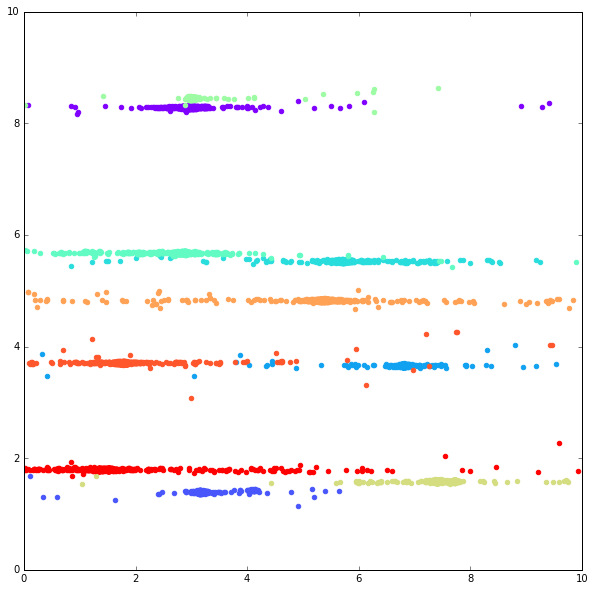

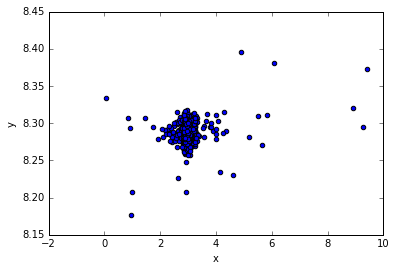

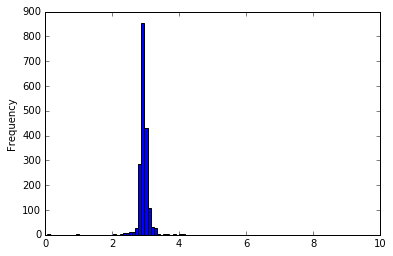

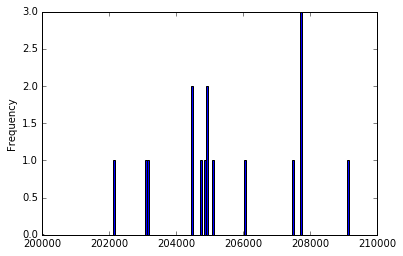

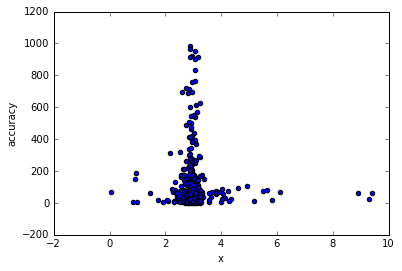

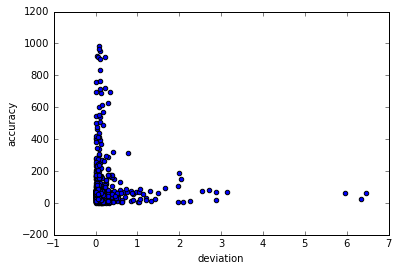

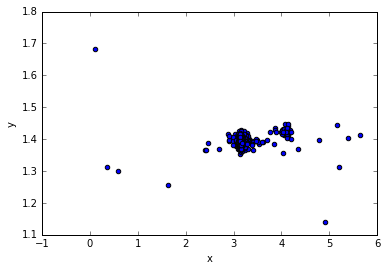

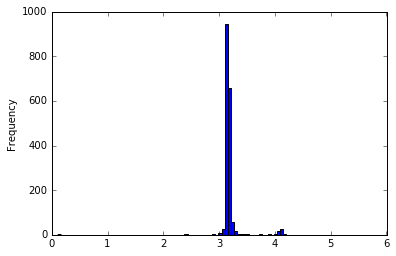

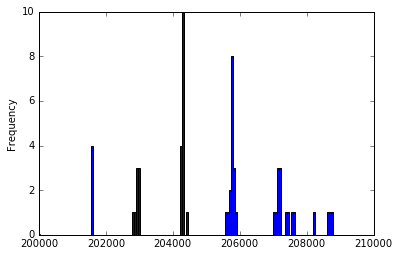

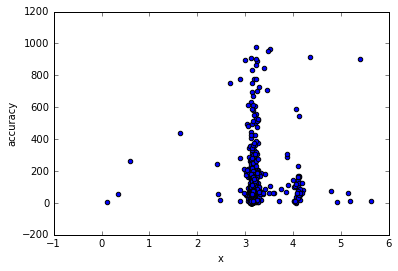

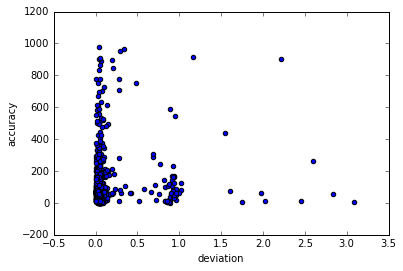

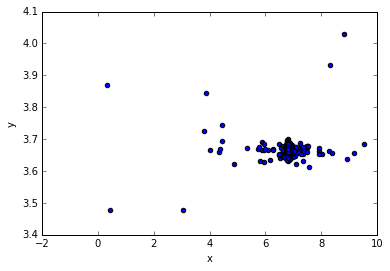

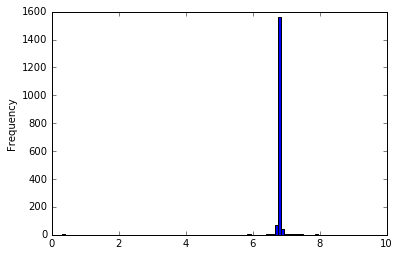

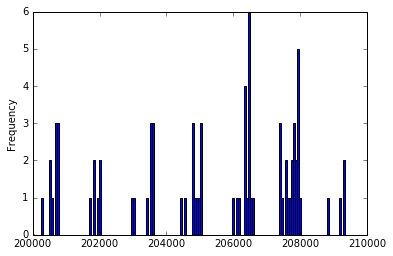

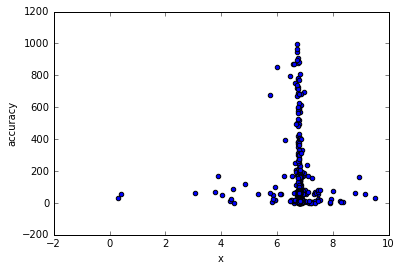

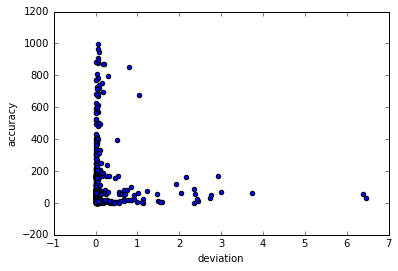

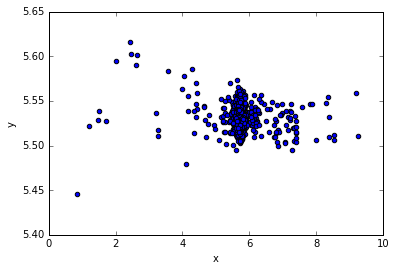

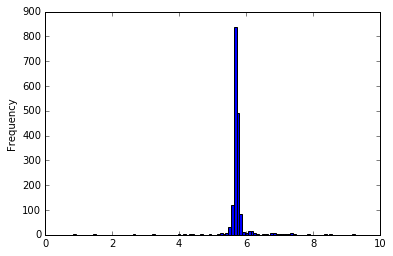

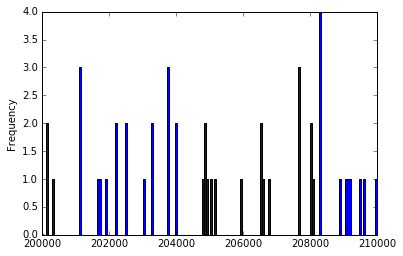

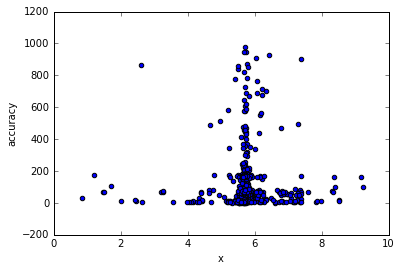

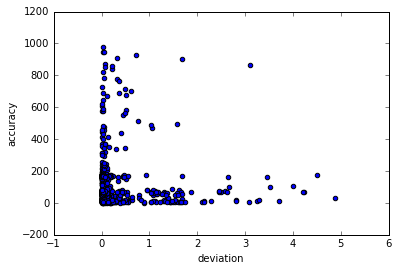

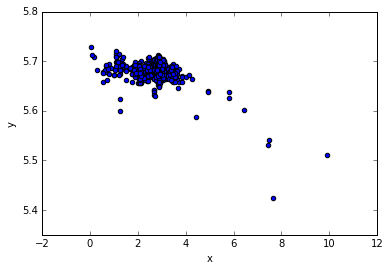

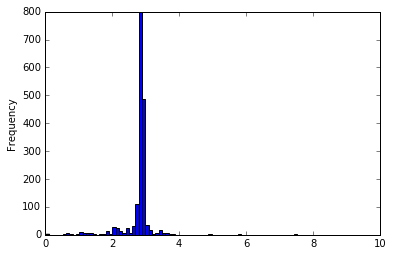

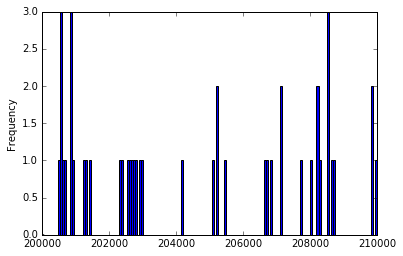

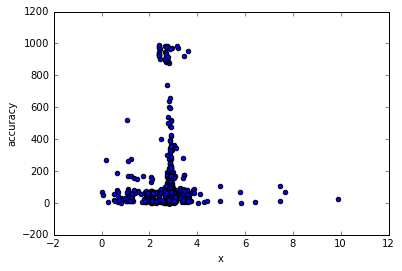

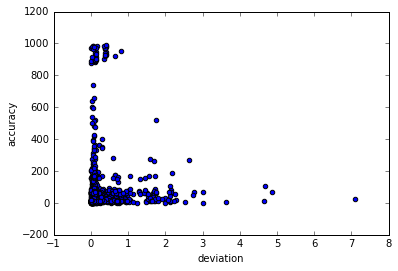

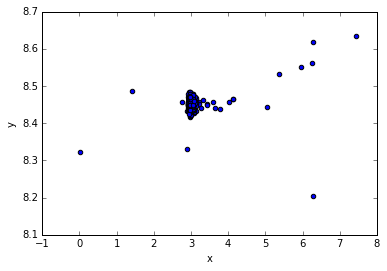

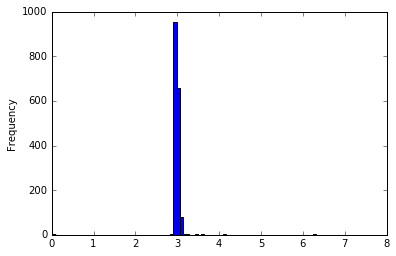

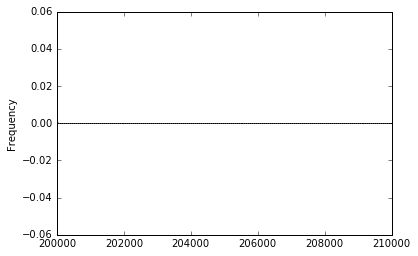

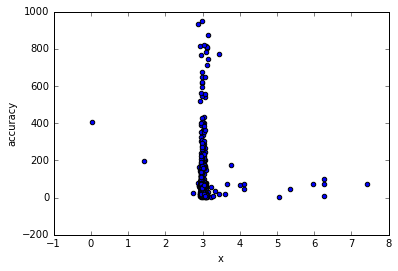

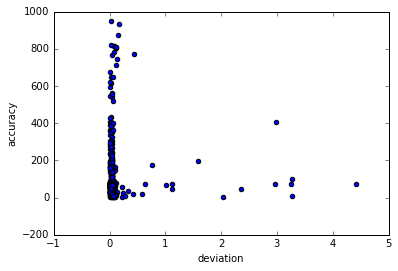

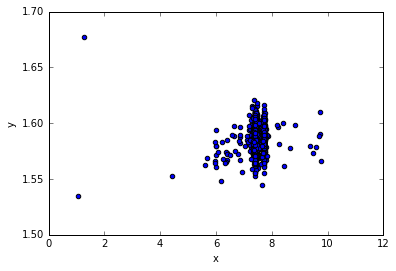

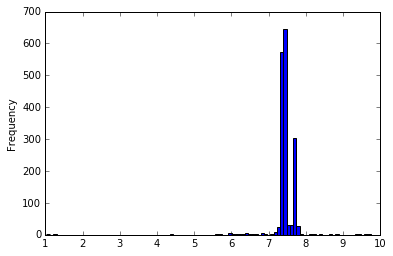

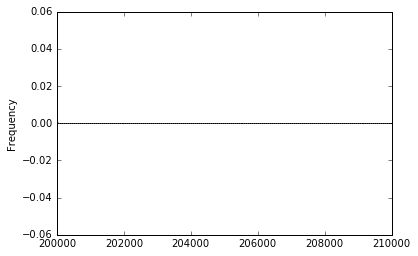

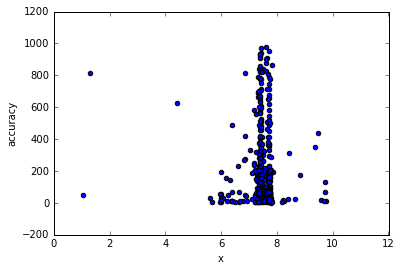

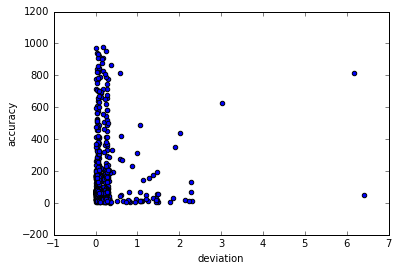

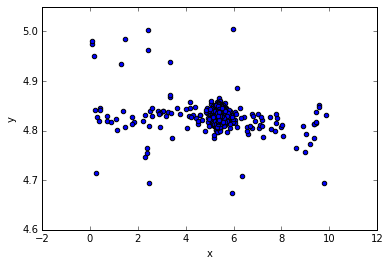

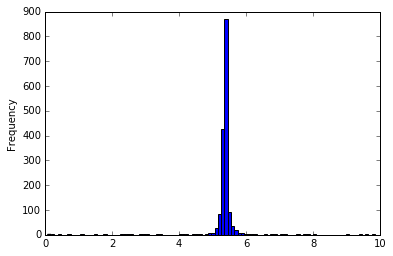

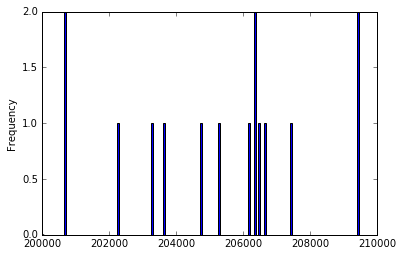

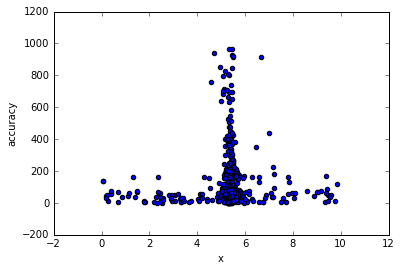

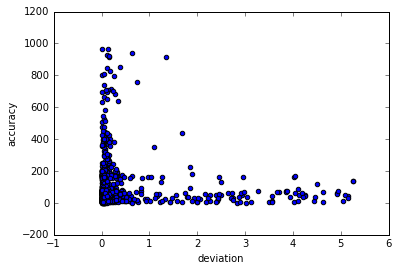

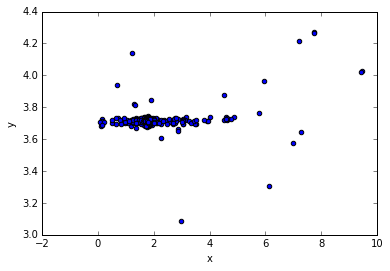

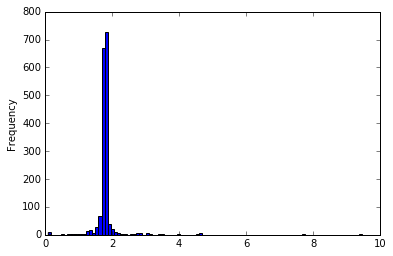

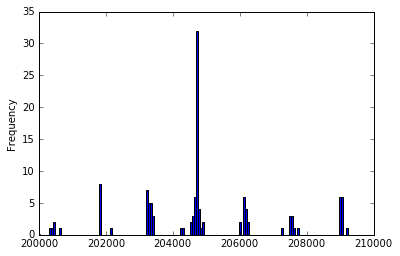

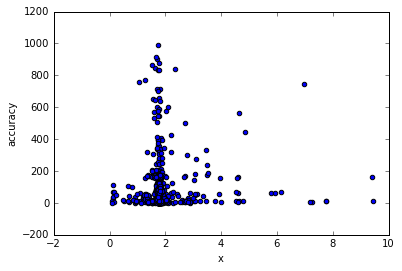

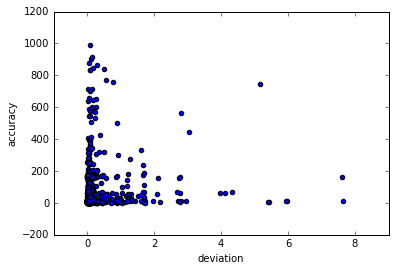

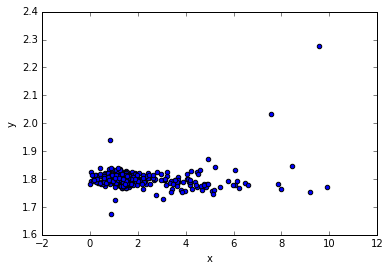

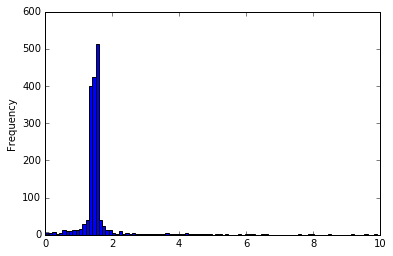

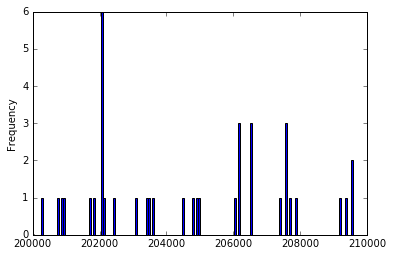

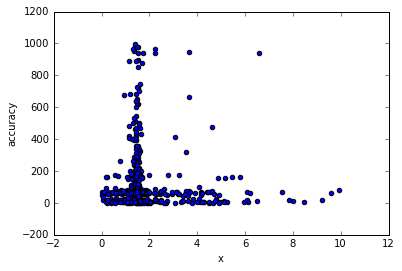

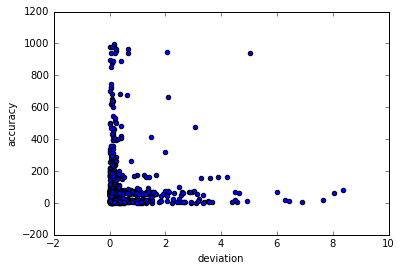

In [4]:
colors=cm.rainbow(np.linspace(0,1,placesToSee))
plt.figure(1, figsize=[10,10])
plt.xlim(0,10)

plt.ylim(0,10)
for p,c in zip(topPlaces, colors):
    pos=train[train['place_id']==p]
    
    
    pos.plot.scatter('x','y')
    plt.figure()
    pos['x'].plot(kind='hist', bins=100)
    plt.figure()

    pos['time'].plot(kind='hist', bins=10000/60, range=[200000, 210000])
    plt.figure()

    pos.plot.scatter('x', 'accuracy')
    
    centerX=pos['x'].mean()
    centerY=pos['y'].mean()
    pos['deviation']=((pos['x']-centerX)**2+(pos['y']-centerY)**2)**0.5
    pos.plot.scatter('deviation','accuracy')

    plt.figure(1)
    plt.scatter(pos.x,pos.y,color=c)

plt.show()